In [1]:
from statsmodels.tsa.stattools import acf as sm_acf, pacf_yw
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Buat dataframe sesuai tabel dan transformasinya
z_t = [60.4, 73.9, 82.6, 77.9, 83.5, 79.8, 88.5, 89.3, 87.2, 90.1]

df = pd.DataFrame({'z_t': z_t})
df['Ln(z_t)'] = np.log(df['z_t'])
df['(1-B)ln(z_t)'] = df['Ln(z_t)'].diff()

In [3]:
df

,z_t,Ln(z_t),(1-B)ln(z_t)
0,60.4,4.100989,NaN
1,73.9,4.302713,0.201724
2,82.6,4.414010,0.111297
3,77.9,4.355426,-0.058584
4,83.5,4.424847,0.069421
5,79.8,4.379524,-0.045323
6,88.5,4.483003,0.103479
7,89.3,4.492001,0.008999
8,87.2,4.468204,-0.023797
9,90.1,4.500920,0.032716


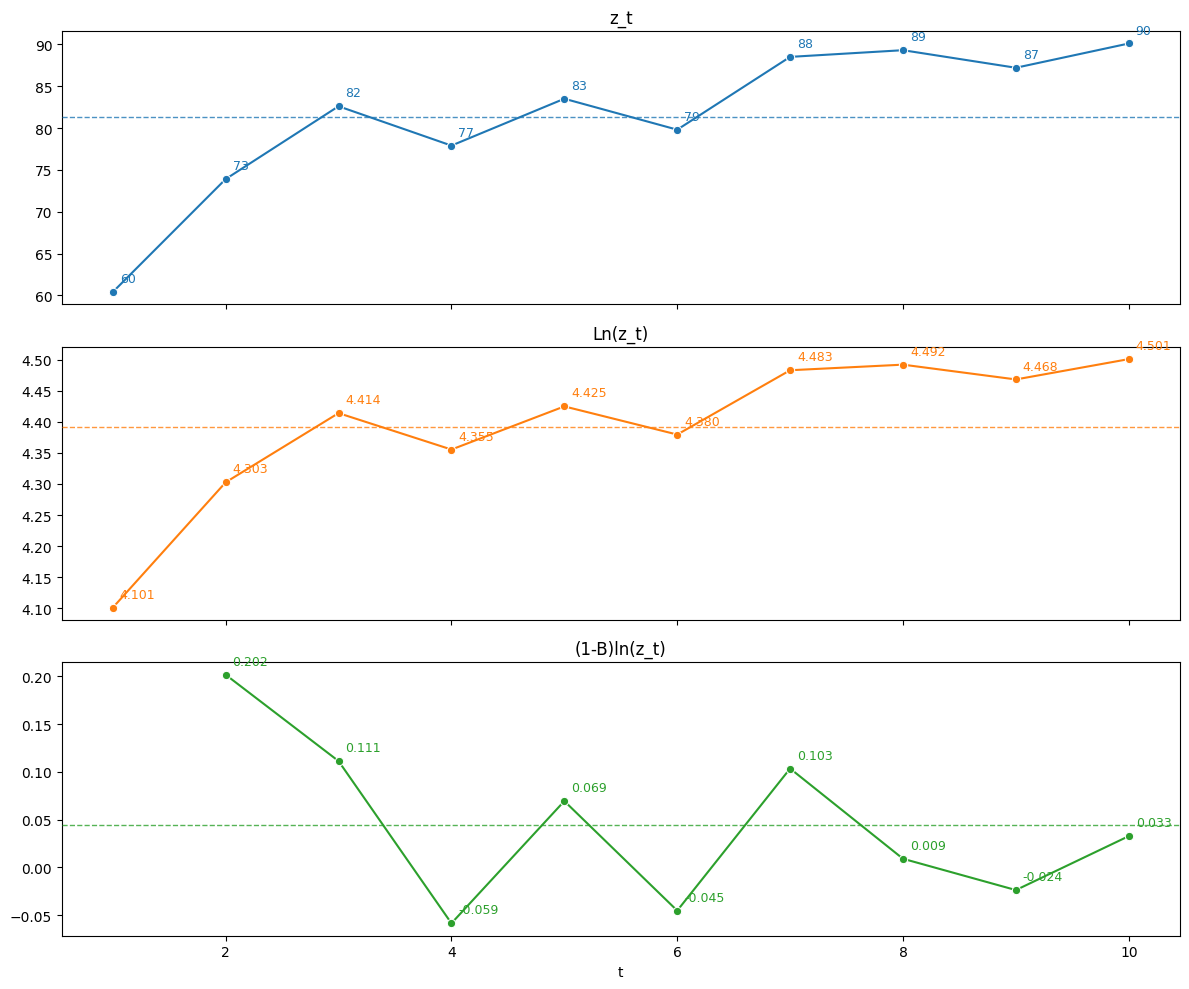

In [10]:
fig2, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# gunakan indeks sebagai sumbu-waktu t = 1..N
t = np.arange(1, len(df) + 1)
mask_diff = df['(1-B)ln(z_t)'].notna()

# berikan label untuk tiap data point
for i, r in df.iterrows():
    axes[0].annotate(f'{int(r["z_t"])}', (t[i], r['z_t']),
                     textcoords='offset points', xytext=(5, 5),
                     ha='left', va='bottom', fontsize=9,
                     color='tab:blue', zorder=15)

for i, r in df.iterrows():
    axes[1].annotate(f'{r["Ln(z_t)"]:.3f}', (t[i], r['Ln(z_t)']),
                     textcoords='offset points', xytext=(5, 5),
                     ha='left', va='bottom', fontsize=9,
                     color='tab:orange', zorder=15)

for i, r in df[mask_diff].iterrows():
    axes[2].annotate(f'{r["(1-B)ln(z_t)"]:.3f}', (i + 1, r['(1-B)ln(z_t)']),
                     textcoords='offset points', xytext=(5, 5),
                     ha='left', va='bottom', fontsize=9,
                     color='tab:green', zorder=15)

# tambahkan garis mean pada tiap subplot
axes[0].axhline(df['z_t'].mean(), color='tab:blue', linestyle='--', linewidth=1, alpha=0.8, zorder=10)
axes[1].axhline(df['Ln(z_t)'].mean(), color='tab:orange', linestyle='--', linewidth=1, alpha=0.8, zorder=10)
axes[2].axhline(df['(1-B)ln(z_t)'].mean(), color='tab:green', linestyle='--', linewidth=1, alpha=0.8, zorder=10)

sns.lineplot(ax=axes[0], x=t, y=df['z_t'], marker='o')
axes[0].set_title('z_t')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].grid(False)

sns.lineplot(ax=axes[1], x=t, y=df['Ln(z_t)'], marker='o', color='tab:orange')
axes[1].set_title('Ln(z_t)')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].grid(False)

sns.lineplot(ax=axes[2], x=t[mask_diff.to_numpy()], y=df.loc[mask_diff, '(1-B)ln(z_t)'], marker='o', color='tab:green')
axes[2].set_title('(1-B)ln(z_t)')
axes[2].set_xlabel('t')
axes[2].set_ylabel('')
axes[2].grid(False)

plt.tight_layout()
plt.show()